<h1>Guided Project: Visualizing Earnings Based On College Majors</h1><br>
Original data on job outcomes: <a href="https://www.census.gov/programs-surveys/acs/">American Community Survey</a><br>
Cleaned dataset by FiveThirtyEight on <a href="https://github.com/fivethirtyeight/data/tree/master/college-majors">Github repo</a>
<h3>Objectives:</h3><br>
Between 2010 and 2012.
<ul>
<li>
Do Students in more popular majors make more money? - Using scatter plots
</li>
<li>
How many Majors are predominantly male? Predominantly female? - Using histograms
</li>
<li>
Which Category of majors have the most students? - Using bar plots
</li>
</ul>

In [1]:
%matplotlib inline
import pandas as pd

In [2]:
recent_grads = pd.read_csv("recent-grads.csv")
print(recent_grads.iloc[0])

Rank                                        1
Major_code                               2419
Major                   PETROLEUM ENGINEERING
Total                                    2339
Men                                      2057
Women                                     282
Major_category                    Engineering
ShareWomen                           0.120564
Sample_size                                36
Employed                                 1976
Full_time                                1849
Part_time                                 270
Full_time_year_round                     1207
Unemployed                                 37
Unemployment_rate                   0.0183805
Median                                 110000
P25th                                   95000
P75th                                  125000
College_jobs                             1534
Non_college_jobs                          364
Low_wage_jobs                             193
Name: 0, dtype: object


Column names and description below:<br><br>
<b>Rank</b> - Rank by median earnings (the dataset is ordered by this column).<br>
<b>Major_code</b> - Major code.<br>
<b>Major</b> - Major description.<br>
<b>Major_category</b> - Category of major.<br>
<b>Total</b> - Total number of people with major.<br>
<b>Sample_size</b> - Sample size (unweighted) of full-time.<br>
<b>Men</b> - Male graduates.<br>
<b>Women</b> - Female graduates.<br>
<b>ShareWomen</b> - Women as share of total.<br>
<b>Employed</b> - Number employed.<br>
<b>Median</b> - Median salary of full-time, year-round workers.<br>
<b>Low_wage_jobs</b> - Number in low-wage service jobs.<br>
<b>Full_time</b> - Number employed 35 hours or more.<br>
<b>Part_time</b> - Number employed less than 35 hours.

In [3]:
recent_grads.head()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
0,1,2419,PETROLEUM ENGINEERING,2339.0,2057.0,282.0,Engineering,0.120564,36,1976,...,270,1207,37,0.018381,110000,95000,125000,1534,364,193
1,2,2416,MINING AND MINERAL ENGINEERING,756.0,679.0,77.0,Engineering,0.101852,7,640,...,170,388,85,0.117241,75000,55000,90000,350,257,50
2,3,2415,METALLURGICAL ENGINEERING,856.0,725.0,131.0,Engineering,0.153037,3,648,...,133,340,16,0.024096,73000,50000,105000,456,176,0
3,4,2417,NAVAL ARCHITECTURE AND MARINE ENGINEERING,1258.0,1123.0,135.0,Engineering,0.107313,16,758,...,150,692,40,0.050125,70000,43000,80000,529,102,0
4,5,2405,CHEMICAL ENGINEERING,32260.0,21239.0,11021.0,Engineering,0.341631,289,25694,...,5180,16697,1672,0.061098,65000,50000,75000,18314,4440,972


In [4]:
recent_grads.tail()

,Rank,Major_code,Major,Total,Men,Women,Major_category,ShareWomen,Sample_size,Employed,...,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
168,169,3609,ZOOLOGY,8409.0,3050.0,5359.0,Biology & Life Science,0.637293,47,6259,...,2190,3602,304,0.046320,26000,20000,39000,2771,2947,743
169,170,5201,EDUCATIONAL PSYCHOLOGY,2854.0,522.0,2332.0,Psychology & Social Work,0.817099,7,2125,...,572,1211,148,0.065112,25000,24000,34000,1488,615,82
170,171,5202,CLINICAL PSYCHOLOGY,2838.0,568.0,2270.0,Psychology & Social Work,0.799859,13,2101,...,648,1293,368,0.149048,25000,25000,40000,986,870,622
171,172,5203,COUNSELING PSYCHOLOGY,4626.0,931.0,3695.0,Psychology & Social Work,0.798746,21,3777,...,965,2738,214,0.053621,23400,19200,26000,2403,1245,308
172,173,3501,LIBRARY SCIENCE,1098.0,134.0,964.0,Education,0.877960,2,742,...,237,410,87,0.104946,22000,20000,22000,288,338,192


In [5]:
recent_grads.describe()

,Rank,Major_code,Total,Men,Women,ShareWomen,Sample_size,Employed,Full_time,Part_time,Full_time_year_round,Unemployed,Unemployment_rate,Median,P25th,P75th,College_jobs,Non_college_jobs,Low_wage_jobs
count,173.000000,173.000000,172.000000,172.000000,172.000000,172.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000,173.000000
mean,87.000000,3879.815029,39370.081395,16723.406977,22646.674419,0.522223,356.080925,31192.763006,26029.306358,8832.398844,19694.427746,2416.329480,0.068191,40151.445087,29501.445087,51494.219653,12322.635838,13284.497110,3859.017341
std,50.084928,1687.753140,63483.491009,28122.433474,41057.330740,0.231205,618.361022,50675.002241,42869.655092,14648.179473,33160.941514,4112.803148,0.030331,11470.181802,9166.005235,14906.279740,21299.868863,23789.655363,6944.998579
min,1.000000,1100.000000,124.000000,119.000000,0.000000,0.000000,2.000000,0.000000,111.000000,0.000000,111.000000,0.000000,0.000000,22000.000000,18500.000000,22000.000000,0.000000,0.000000,0.000000
25%,44.000000,2403.000000,4549.750000,2177.500000,1778.250000,0.336026,39.000000,3608.000000,3154.000000,1030.000000,2453.000000,304.000000,0.050306,33000.000000,24000.000000,42000.000000,1675.000000,1591.000000,340.000000
50%,87.000000,3608.000000,15104.000000,5434.000000,8386.500000,0.534024,130.000000,11797.000000,10048.000000,3299.000000,7413.000000,893.000000,0.067961,36000.000000,27000.000000,47000.000000,4390.000000,4595.000000,1231.000000
75%,130.000000,5503.000000,38909.750000,14631.000000,22553.750000,0.703299,338.000000,31433.000000,25147.000000,9948.000000,16891.000000,2393.000000,0.087557,45000.000000,33000.000000,60000.000000,14444.000000,11783.000000,3466.000000
max,173.000000,6403.000000,393735.000000,173809.000000,307087.000000,0.968954,4212.000000,307933.000000,251540.000000,115172.000000,199897.000000,28169.000000,0.177226,110000.000000,95000.000000,125000.000000,151643.000000,148395.000000,48207.000000


Before cleaning the recent_grads dataset, let's take a look at the number of rows.

In [6]:
raw_data_count = recent_grads.shape[0]
print("Number of rows: " + str(raw_data_count))

Number of rows: 173


There are 173 rows currently.<br>
Now we drop rows that do not contain any values.

In [7]:
recent_grads = recent_grads.dropna()

In [8]:
cleaned_data_count = recent_grads.shape[0]
print("Number of rows: " + str(cleaned_data_count))

Number of rows: 172


Out of 173 rows, only one was dropped.

Below, we create 6 different scatter plots:
<ol>
<li>Sample_size vs. Median</li>
<li>Sample_size vs. Unemployment_rate</li>
<li>Full_time vs. Median</li>
<li>ShareWomen vs. Unemployment_rate</li>
<li>Men vs. Median</li>
<li>Women vs. Median</li>
</ol><br><br>
We have three questions we want to answer with the scatter plots:
<ul>
<li>Do students in more popular majors make more money?</li>
<li>Do students that majored in subjects that were majority female make more money?</li>
<li>Is there any link between the number of full-time employees and median salary?</li>
</ul>

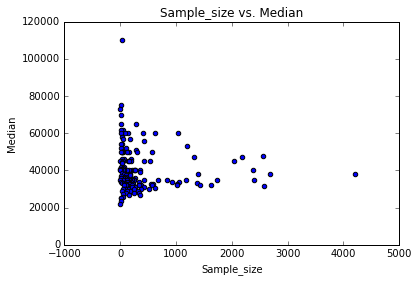

In [9]:
recent_grads.plot(x='Sample_size',y='Median',kind='scatter', title='Sample_size vs. Median')

Scatter shows heavy right skew between sample size and median salary.<br>
Most concentrated around the median salary of 20,000 - 60,000.

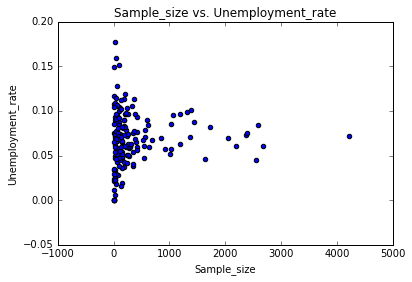

In [10]:
recent_grads.plot(x='Sample_size',y='Unemployment_rate',kind='scatter',title='Sample_size vs. Unemployment_rate')

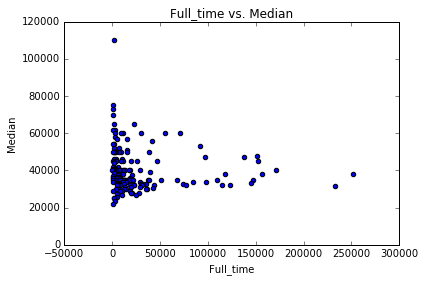

In [11]:
recent_grads.plot(x='Full_time',y='Median',kind='scatter',title='Full_time vs. Median')

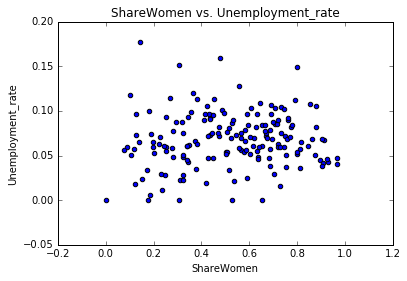

In [12]:
recent_grads.plot(x='ShareWomen',y='Unemployment_rate',kind='scatter',title='ShareWomen vs. Unemployment_rate')

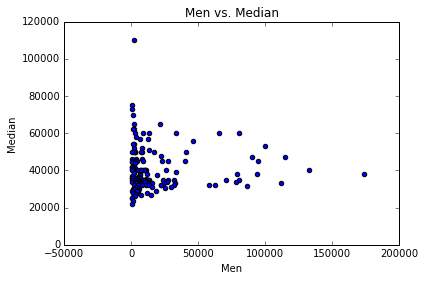

In [13]:
recent_grads.plot(x='Men',y='Median',kind='scatter',title='Men vs. Median')

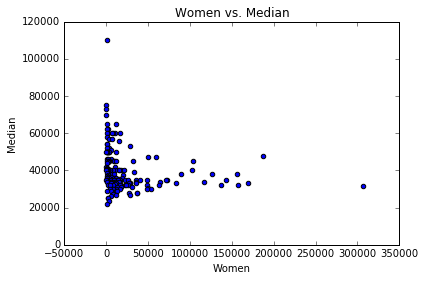

In [14]:
recent_grads.plot(x='Women',y='Median',kind='scatter',title='Women vs. Median')

Next, we create 8 histograms for:
<ol>
<li>Sample_size</li>
<li>Median</li>
<li>Employed</li>
<li>Full_time</li>
<li>ShareWomen</li>
<li>Unemployment_rate</li>
<li>Men</li>
<li>Women</li>
</ol><br><br>
We have two questions we want to answer from these histograms:
<ul>
<li>What percent of majors are predominantly male? Predominantly female?</li>
<li>What's the most common median salary range?</li>
</ul>

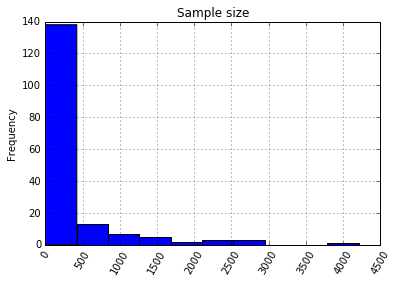

In [39]:
recent_grads['Sample_size'].plot(kind='hist', rot=60, title='Sample size')

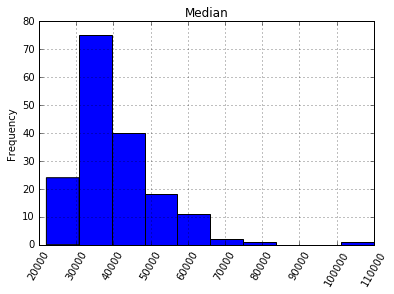

In [40]:
recent_grads['Median'].plot(kind='hist', rot=60, title='Median')

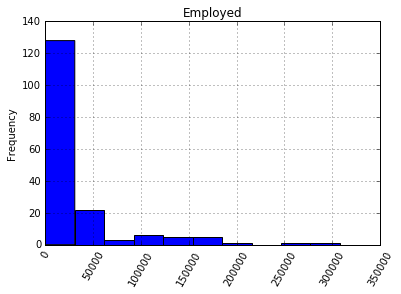

In [60]:
recent_grads['Employed'].plot(kind='hist', rot=60, title='Employed')

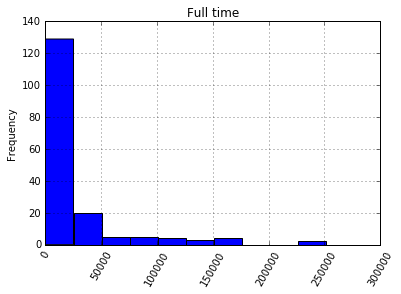

In [70]:
recent_grads['Full_time'].plot(kind='hist', rot=60, title='Full time')

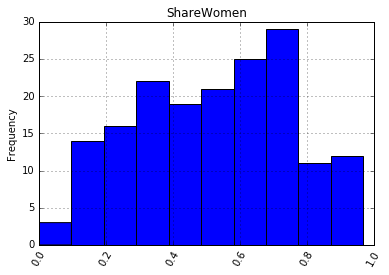

In [72]:
recent_grads['ShareWomen'].plot(kind='hist', rot=60, title='ShareWomen')

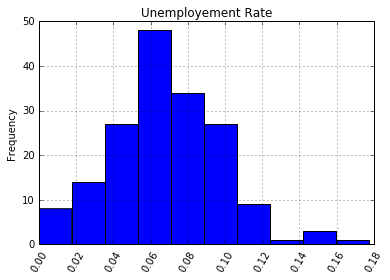

In [73]:
recent_grads['Unemployment_rate'].plot(kind='hist', rot=60, title='Unemployement Rate')

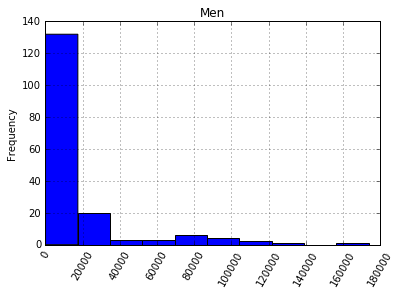

In [74]:
recent_grads['Men'].plot(kind='hist', rot=60, title='Men', grid=True)

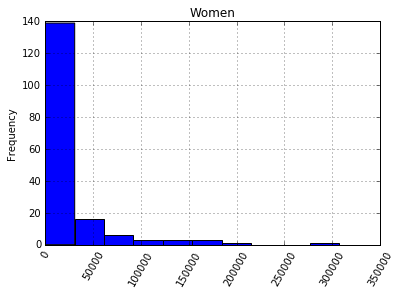

In [75]:
recent_grads['Women'].plot(kind='hist', rot=60, title='Women', grid=True)

Below, we create two different scatter matrix plots:
<ol>
<li>Sample_size and Median</li>
<li>Sample_size, Median and Unemployment_rate</li>
</ol><br>
We will use these two plots to try and answer our previous questions from above.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f315b71d0>,
      dtype=object)

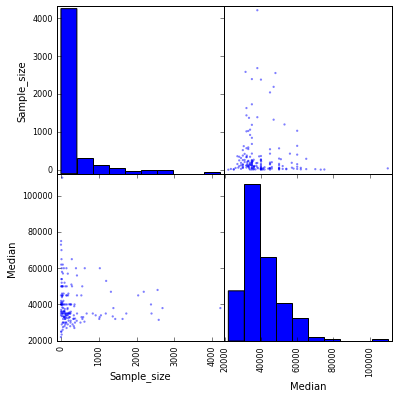

In [76]:
# 2 by 2 matrix
from pandas.plotting import scatter_matrix
scatter_matrix(recent_grads[['Sample_size', 'Median']], figsize=(6,6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f9f3146cbe0>,
      dtype=object)

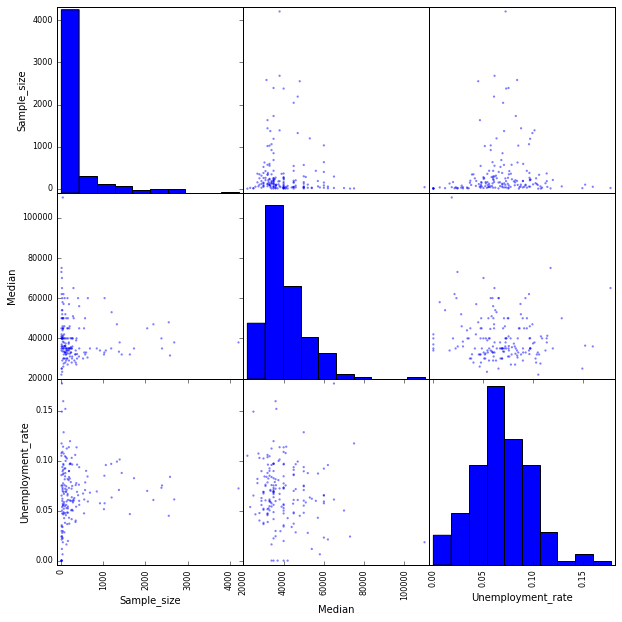

In [77]:
# 3 by 3 matrix
scatter_matrix(recent_grads[['Sample_size','Median', 'Unemployment_rate']], figsize=(10,10))

Lastly, we create four bar plots for the first and last 10 depicting the most popular and unpopular majors studied by both sexes:
<ol>
<li>Major vs. ShareWomen (First ten)</li>
<li>Major vs. ShareWomen (Last ten)</li>
<li>Major vs. Unemployment_rate (First ten)</li>
<li>Major vs. Unemployment_rate (Last ten)</li>
</ol>

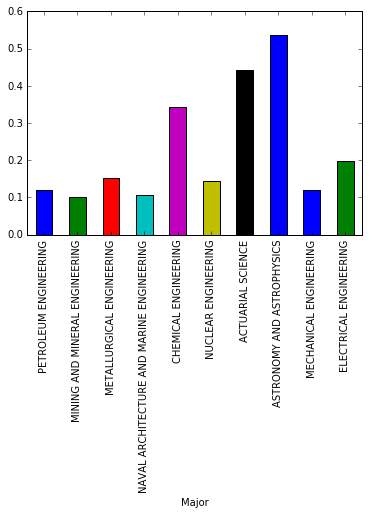

In [78]:
# first ten
recent_grads[:10].plot.bar(x='Major', y='ShareWomen', legend=False)

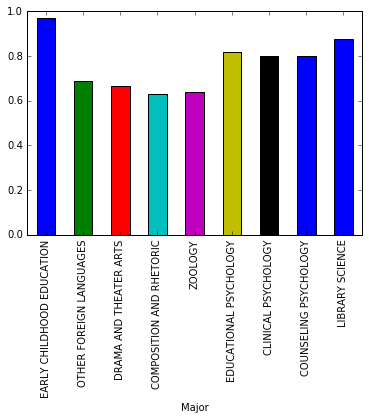

In [79]:
# last ten
recent_grads[163:].plot.bar(x='Major', y='ShareWomen', legend=False)

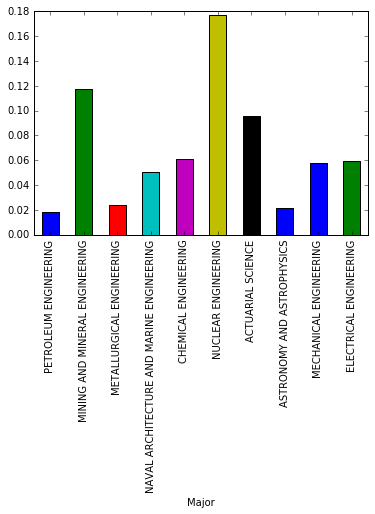

In [80]:
# first ten
recent_grads[:10].plot.bar(x='Major', y='Unemployment_rate', legend=False)

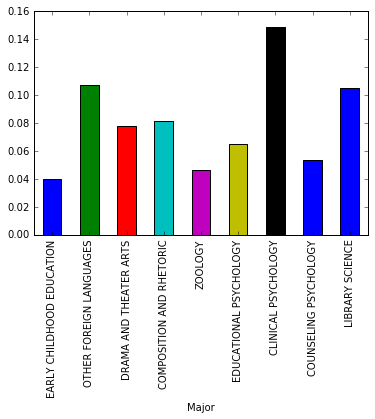

In [81]:
# last ten
recent_grads[163:].plot.bar(x='Major', y='Unemployment_rate', legend=False)